In [ ]:
#pip install tfcausalimpact

In [ ]:
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects/Causal Impact/revenue_data.xlsx')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.head()

,Shop_Morumbi,Uni_StoAmaro,Uni_Pinheiros,Shop_MrkPlace,Uni_Butanta,Uni_Lapa,Shop_Ibirapuera,Shop_FreiCaneca,Shop_Interlagos,Uni_VilaMariana,Uni_Socorro,Shop_BoaVista,Uni_Brooklin,Shop_VilaOlimpia,Uni_Perdizes
date,,,,,,,,,,,,,,,
2023-03-01,1695.42,2045.28,1820.02,2151.58,2248.72,2414.15,2016.35,1896.11,2250.95,2249.97,2313.42,2258.33,1800.38,1695.42,2288.46
2023-03-02,1769.74,2003.26,1899.81,2245.91,2351.38,2400.83,2104.75,1979.24,2303.50,2293.26,2118.26,2357.33,1879.31,1769.74,2344.40
2023-03-03,2113.16,2361.61,2268.47,2681.72,2325.66,2167.88,2513.17,2363.30,2080.14,2538.48,2560.81,2814.77,2243.99,2113.16,2348.41
2023-03-04,2245.31,2248.56,2410.33,2849.42,2405.94,2341.37,2670.33,2511.09,2066.58,2410.16,2351.77,2990.79,2384.32,2245.31,2523.08
2023-03-05,1991.11,2335.98,2137.44,2526.83,1990.85,2300.00,2368.01,2226.80,2162.09,2035.99,2335.76,2652.19,2114.38,1991.11,2154.05


In [ ]:
# defining the dates
training_start = pd.to_datetime("2023-03-01")
training_end = pd.to_datetime("2023-06-09")
treatment_start = pd.to_datetime("2023-06-10")
treatment_end = pd.to_datetime("2023-06-11")

In [ ]:
# get the training data only
df_training = df[df.index <= training_end]

In [ ]:
df_training.tail()

,Shop_Morumbi,Uni_StoAmaro,Uni_Pinheiros,Shop_MrkPlace,Uni_Butanta,Uni_Lapa,Shop_Ibirapuera,Shop_FreiCaneca,Shop_Interlagos,Uni_VilaMariana,Uni_Socorro,Shop_BoaVista,Uni_Brooklin,Shop_VilaOlimpia,Uni_Perdizes
date,,,,,,,,,,,,,,,
2023-06-05,2563.049164,2426.324781,2825.736737,2885.333893,2483.011562,2642.750803,2730.355414,2531.919723,2711.283336,2359.55,2554.868553,3057.162261,2402.152847,2305.674818,3130.255973
2023-06-06,2615.582145,2454.281003,2886.043041,2604.665449,2769.918000,2713.932865,2462.969656,2379.889387,2527.846792,2376.54,2901.056786,2817.705830,2208.823585,2130.746160,2254.291744
2023-06-07,2688.238239,2493.193466,3050.264920,3024.424513,2720.995722,2465.812835,2852.355303,2622.577698,2830.484828,2640.74,2343.329893,3109.977142,2617.816256,2425.401757,2789.856243
2023-06-08,2751.437018,2518.415782,3025.610300,2526.072429,2437.420982,2303.650385,2315.451244,2239.634104,2371.813646,2346.06,2315.417687,2623.597627,2124.859189,1931.221568,2668.431468
2023-06-09,2783.271537,2559.363737,3158.425285,2496.830791,2554.747764,2491.474959,2396.102287,2189.417282,2376.269981,2643.26,2653.401205,2621.049601,2116.475982,2048.773817,2688.855932


#### Creating a control group

In [ ]:
test = adfuller(x = df_training['Shop_Morumbi'])[1]
print(test)
if test< 0.05:
    print("Data is stationary")
else:
    print("Time series is not stationary")

0.4373957957567152
Time series is not stationary


In [ ]:
# Differening calculates the difference or Pct Difference from the previous date
differencing = df_training.pct_change().dropna(thresh = 1,axis=1).dropna()
differencing.head()

,Shop_Morumbi,Uni_StoAmaro,Uni_Pinheiros,Shop_MrkPlace,Uni_Butanta,Uni_Lapa,Shop_Ibirapuera,Shop_FreiCaneca,Shop_Interlagos,Uni_VilaMariana,Uni_Socorro,Shop_BoaVista,Uni_Brooklin,Shop_VilaOlimpia,Uni_Perdizes
date,,,,,,,,,,,,,,,
2023-03-02,0.043836,-0.020545,0.043840,0.043842,0.045653,-0.005517,0.043842,0.043842,0.023346,0.019240,-0.084360,0.043838,0.043841,0.043836,0.024444
2023-03-03,0.194051,0.178883,0.194051,0.194046,-0.010938,-0.097029,0.194047,0.194044,-0.096965,0.106931,0.208921,0.194050,0.194050,0.194051,0.001710
2023-03-04,0.062537,-0.047870,0.062536,0.062534,0.034519,0.080027,0.062535,0.062535,-0.006519,-0.050550,-0.081630,0.062534,0.062536,0.062537,0.074378
2023-03-05,-0.113214,0.038878,-0.113217,-0.113213,-0.172527,-0.017669,-0.113214,-0.113214,0.046216,-0.155247,-0.006808,-0.113214,-0.113215,-0.113214,-0.146262
2023-03-06,0.191627,0.077141,0.191631,0.191627,0.128704,-0.050865,0.191629,0.191629,0.055798,0.082211,0.071998,0.191630,0.191626,0.191627,0.052752


In [ ]:
#Rest on the differenced data
test = adfuller(x = differencing['Shop_Morumbi'])[1]
print(test)
if test< 0.05:
    print("Data is stationary")
else:
    print("Time series is not stationary")

1.672319674811595e-14
Data is stationary


In [ ]:
#Create correlation
market_cor= pd.Series(differencing.corr().abs()['Shop_Morumbi'])

#Create a list with markets with correlation coef >=0.3
markets_to_keep = list(market_cor[market_cor >=0.3].index)

#Keep only markets on the above list
final_data = df.drop(columns=[col for col in df if col not in markets_to_keep])


In [ ]:
final_data.head()

,Shop_Morumbi,Uni_Pinheiros,Shop_MrkPlace,Shop_Ibirapuera,Shop_FreiCaneca,Shop_BoaVista,Uni_Brooklin,Shop_VilaOlimpia
date,,,,,,,,
2023-03-01,1695.42,1820.02,2151.58,2016.35,1896.11,2258.33,1800.38,1695.42
2023-03-02,1769.74,1899.81,2245.91,2104.75,1979.24,2357.33,1879.31,1769.74
2023-03-03,2113.16,2268.47,2681.72,2513.17,2363.30,2814.77,2243.99,2113.16
2023-03-04,2245.31,2410.33,2849.42,2670.33,2511.09,2990.79,2384.32,2245.31
2023-03-05,1991.11,2137.44,2526.83,2368.01,2226.80,2652.19,2114.38,1991.11


In [ ]:
june_df = final_data[final_data.index >= '2023-06-01']

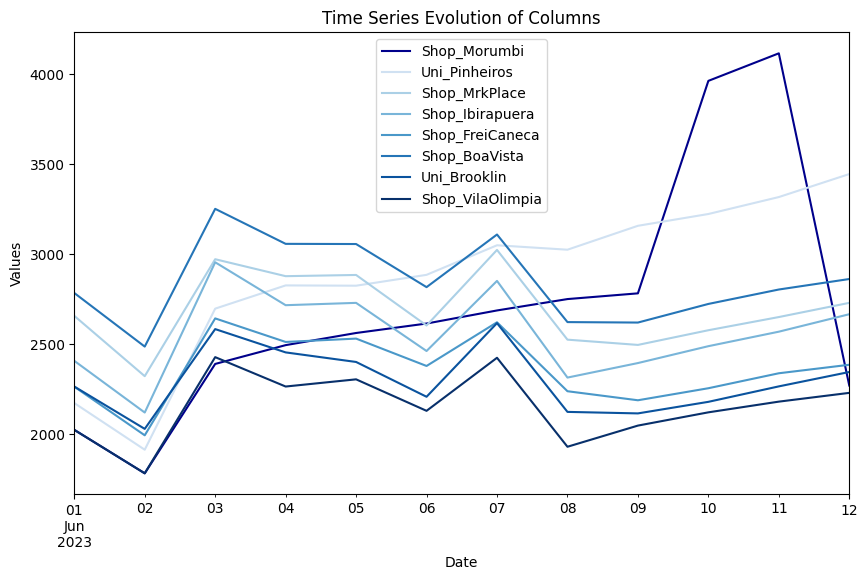

In [ ]:
num_lines = len(june_df.columns)
num_lines_excluding_store1 = num_lines - 1
store1_color = 'darkblue'

# generate a gradient for the rest of the stores
colors = [store1_color] + plt.cm.Blues(np.linspace(0.2, 1, num_lines_excluding_store1)).tolist()

june_df.plot(figsize=(10, 6), legend=True, color=colors)
plt.title('Time Series Evolution of Columns')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

#### Implementing CausalImpact

In [ ]:
#Prepare Pre and Post periods
pre_period = [training_start,training_end]
post_period = [treatment_start,treatment_end]

In [ ]:
#Fitting CausalImpact
impact = CausalImpact(data=final_data,
                      pre_period=pre_period,
                      post_period=post_period)

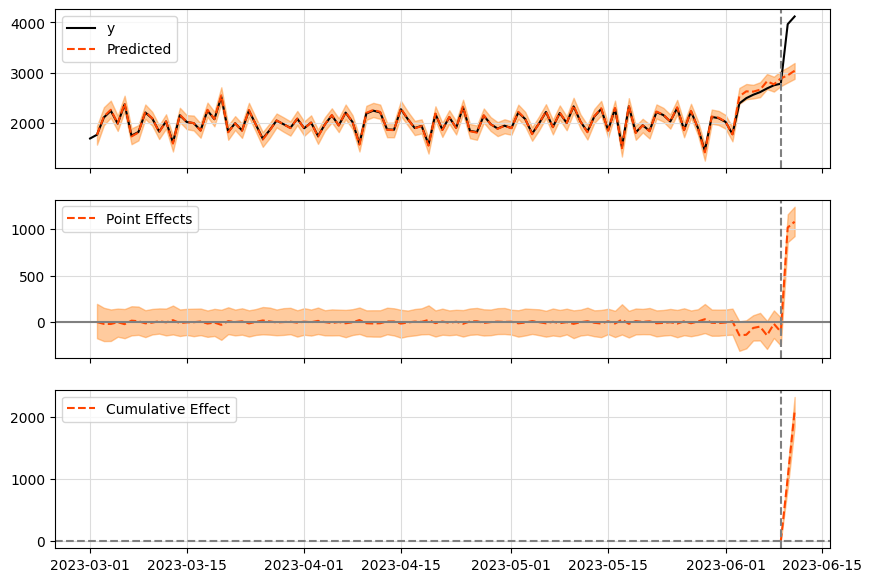

In [ ]:
impact.plot()

In [ ]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    4039.86            8079.72
Prediction (s.d.)         2994.32 (63.93)    5988.63 (127.85)
95% CI                    [2871.0, 3121.58]  [5741.99, 6243.16]

Absolute effect (s.d.)    1045.54 (63.93)    2091.09 (127.85)
95% CI                    [918.28, 1168.86]  [1836.56, 2337.73]

Relative effect (s.d.)    34.92% (2.13%)     34.92% (2.13%)
95% CI                    [30.67%, 39.04%]   [30.67%, 39.04%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 4039.86. By contrast, in the absence of an
intervention, we would have expected an average response of 2994.32.
The 95% interval of this counterfactual prediction is [2871.0, 3121.58].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1045.54 with a 95% interval of
[918.28, 1168.86]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 8079.72.
By contrast, had the intervention not taken place, we would have expected
a sum of 5988.63. The 95% interval of this prediction is [5741.99, 6243.16].


The above results are given in terms of absolute numbers. In relative
terms, the